# Detecting customers who are likely to cancel a subscription to a service

## <p style="text-align: center;">(Telecom Dataset Churn Analysis)</p> 

   In this project, the goal is to identify customers churn, that is, customers most likely to cancel subscription to a fictitious Telecom company. That is a really interesting problem, because if you could predict in advance which customers are at risk of leaving, you could reduce customer retention efforts by directing them toward such customers, providing adequate intervention to encourage them to stay and minimize customer exit. 
   
   The dataset for this exercise relates features of account and usage for churn and non churn clients. The Telecom dataset was obtained from [OpenML](https://www.openml.org/d/40701) public repository. That is a supervised classification problem and Machine Learning algorithms will be used for the development of predictive models and evaluation of accuracy and performance. It seeks to find the most appropriate model for the business.

# 1. Exploratory Analysis

In this approach, we will analyze datasets to summarize their main characteristics, with visual and quantitative methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import interp
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

%matplotlib inline

### 1.1 Load Data

The dataset can be downloaded in [link](https://github.com/thaiseq/Analytics/blob/master/churn.csv), attached to this project or in the official page in [OpenML](https://www.openml.org/d/40701).

In [2]:
# load csv
customers = pd.read_csv('churn.csv')

# convert categorical variable into dummy/indicator variables
customers = pd.get_dummies(customers)

# remove target and ID columns because the arbitrary ID data isn't relevant to the analysis
features = customers[customers.columns.difference(
    ['area_code', 'phone_number', 'class'])]

# target
targets = customers[['class']]

### 1.2 Univariate Analysis

In [3]:
# describe the characteristics of variables
features.describe()

account_length  international_plan  number_customer_service_calls  \
count      5000.00000         5000.000000                    5000.000000   
mean        100.25860            0.094600                       1.570400   
std          39.69456            0.292691                       1.306363   
min           1.00000            0.000000                       0.000000   
25%          73.00000            0.000000                       1.000000   
50%         100.00000            0.000000                       1.000000   
75%         127.00000            0.000000                       2.000000   
max         243.00000            1.000000                       9.000000   

       number_vmail_messages       state  total_day_calls  total_day_charge  \
count            5000.000000  5000.00000      5000.000000       5000.000000   
mean                7.755200    25.99840       100.029400         30.649668   
std                13.546393    14.80348        19.831197          9.162069   
min                 0.000000     0.00000         0.000000          0.000000   
25%                 0.000000    13.00000        87.000000         24.430000   
50%                 0.000000    26.00000       100.000000         30.620000   
75%                17.000000    39.00000       113.000000         36.750000   
max                52.000000    50.00000       165.000000         59.760000   

       total_day_minutes  total_eve_calls  total_eve_charge  \
count        5000.000000      5000.000000       5000.000000   
mean          180.288900       100.191000         17.054322   
std            53.894699        19.826496          4.296843   
min             0.000000         0.000000          0.000000   
25%           143.700000        87.000000         14.140000   
50%           180.100000       100.000000         17.090000   
75%           216.200000       114.000000         19.900000   
max           351.500000       170.000000         30.910000   

       total_eve_minutes  total_intl_calls  total_intl_charge  \
count        5000.000000       5000.000000        5000.000000   
mean          200.636560          4.435200           2.771196   
std            50.551309          2.456788           0.745514   
min             0.000000          0.000000           0.000000   
25%           166.375000          3.000000           2.300000   
50%           201.000000          4.000000           2.780000   
75%           234.100000          6.000000           3.240000   
max           363.700000         20.000000           5.400000   

       total_intl_minutes  total_night_calls  total_night_charge  \
count         5000.000000        5000.000000         5000.000000   
mean            10.261780          99.919200            9.017732   
std              2.761396          19.958686            2.273763   
min              0.000000           0.000000            0.000000   
25%              8.500000          87.000000            7.510000   
50%             10.300000         100.000000            9.020000   
75%             12.000000         113.000000           10.560000   
max             20.000000         175.000000           17.770000   

       total_night_minutes  voice_mail_plan  
count          5000.000000      5000.000000  
mean            200.391620         0.264600  
std              50.527789         0.441164  
min               0.000000         0.000000  
25%             166.900000         0.000000  
50%             200.400000         0.000000  
75%             234.700000         1.000000  
max             395.000000         1.000000

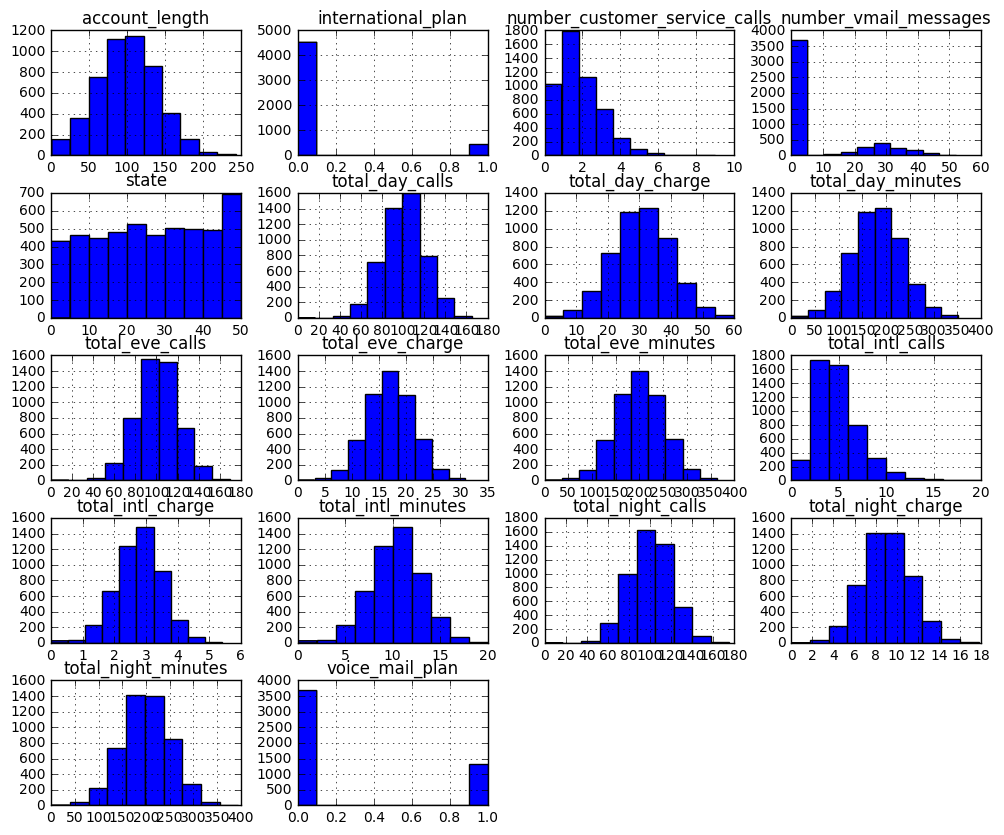

In [4]:
# analysis of the dispersion of the features
features.hist(figsize=(12, 10))
plt.show()

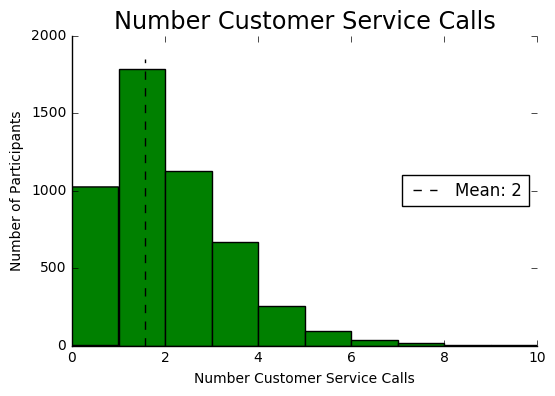

In [5]:
# Plot histogram of number_customer_service_calls
plt.hist(
    features.number_customer_service_calls,
    bins=10,
    range=(0, 10),
    color='green')
plt.xlabel('Number Customer Service Calls')
plt.ylabel('Number of Participants')
plt.vlines(
    x=features.number_customer_service_calls.mean(),
    ymin=0,
    ymax=1850,
    linestyles='dashed',
    label="Mean: {:0.0f}".format(
        features.number_customer_service_calls.mean()))
plt.legend(loc=5, fontsize='large')
sns.set_style('white', {'axes.grid': False})
plt.title('Number Customer Service Calls', fontsize='xx-large')
sns.despine()

The data included 5.000 users and by the exploratory analysis, it is observed that:

   * 14% of the base are classified as churn.
   * 50% of the customers who called the company more than 3 times are classified as Churn.
   * 10% of those with no international plan are classified as Churn x 8% of those with an international plan are Churn.
   * There are 18 attributes columns
   * There are no missing values.

### 1.3 Correlation matrix

A correlation matrix describing the correlation between the different features in the dataset.

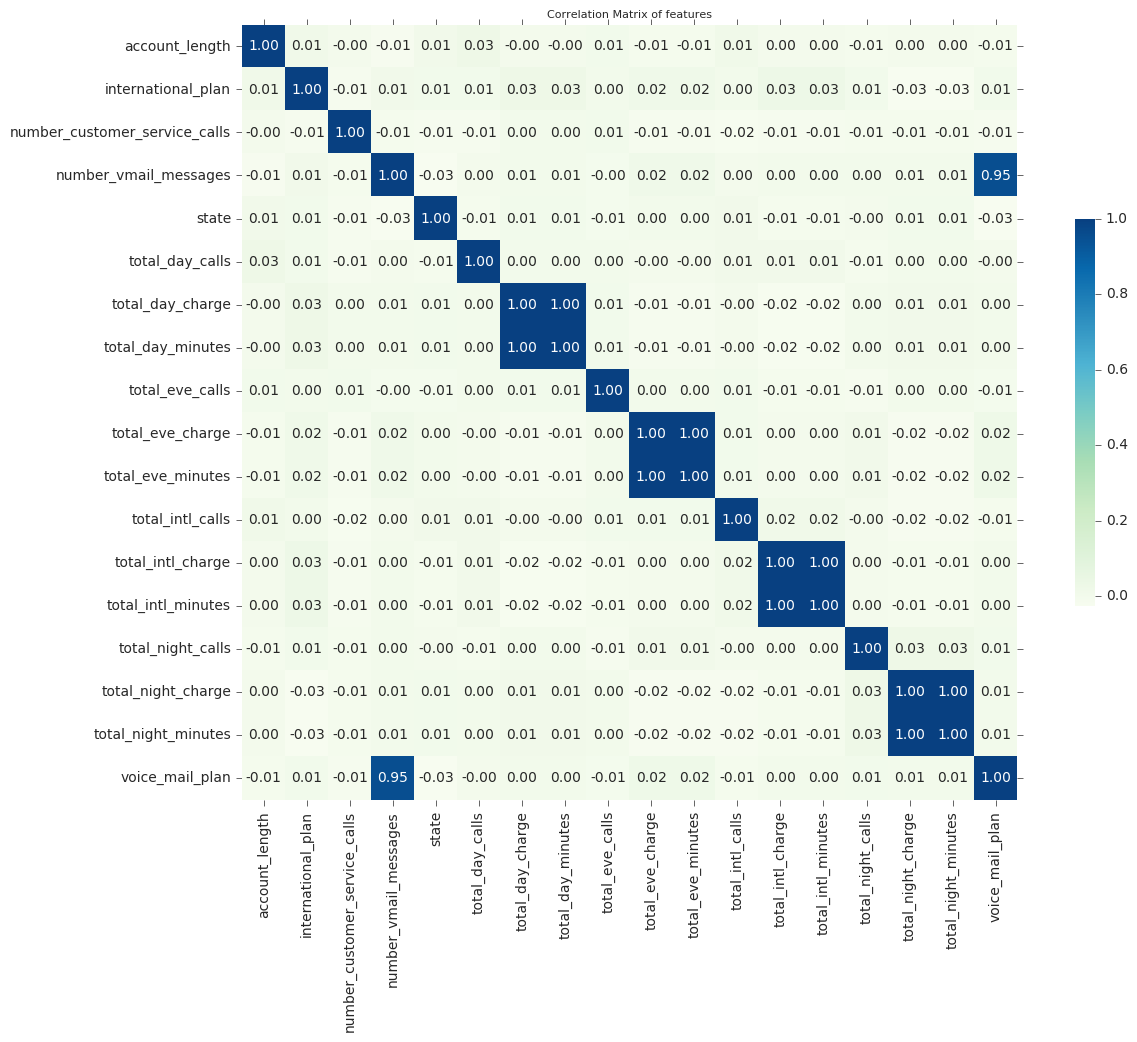

In [6]:
correlation_matrix = features.corr()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='GnBu',
    cbar_kws={"shrink": .5},
    robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()

The result of this Correlation Matrix means that there isn't much redundant or superfluous data in our training set. We can see that the variables 'voice_mail_plan' and 'number_vmail_messages' are highly correlated. I'll still leave both features in for the purposes of this exercise.

### 1.4 Pairwise relationships between the features

This is a Grid of axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

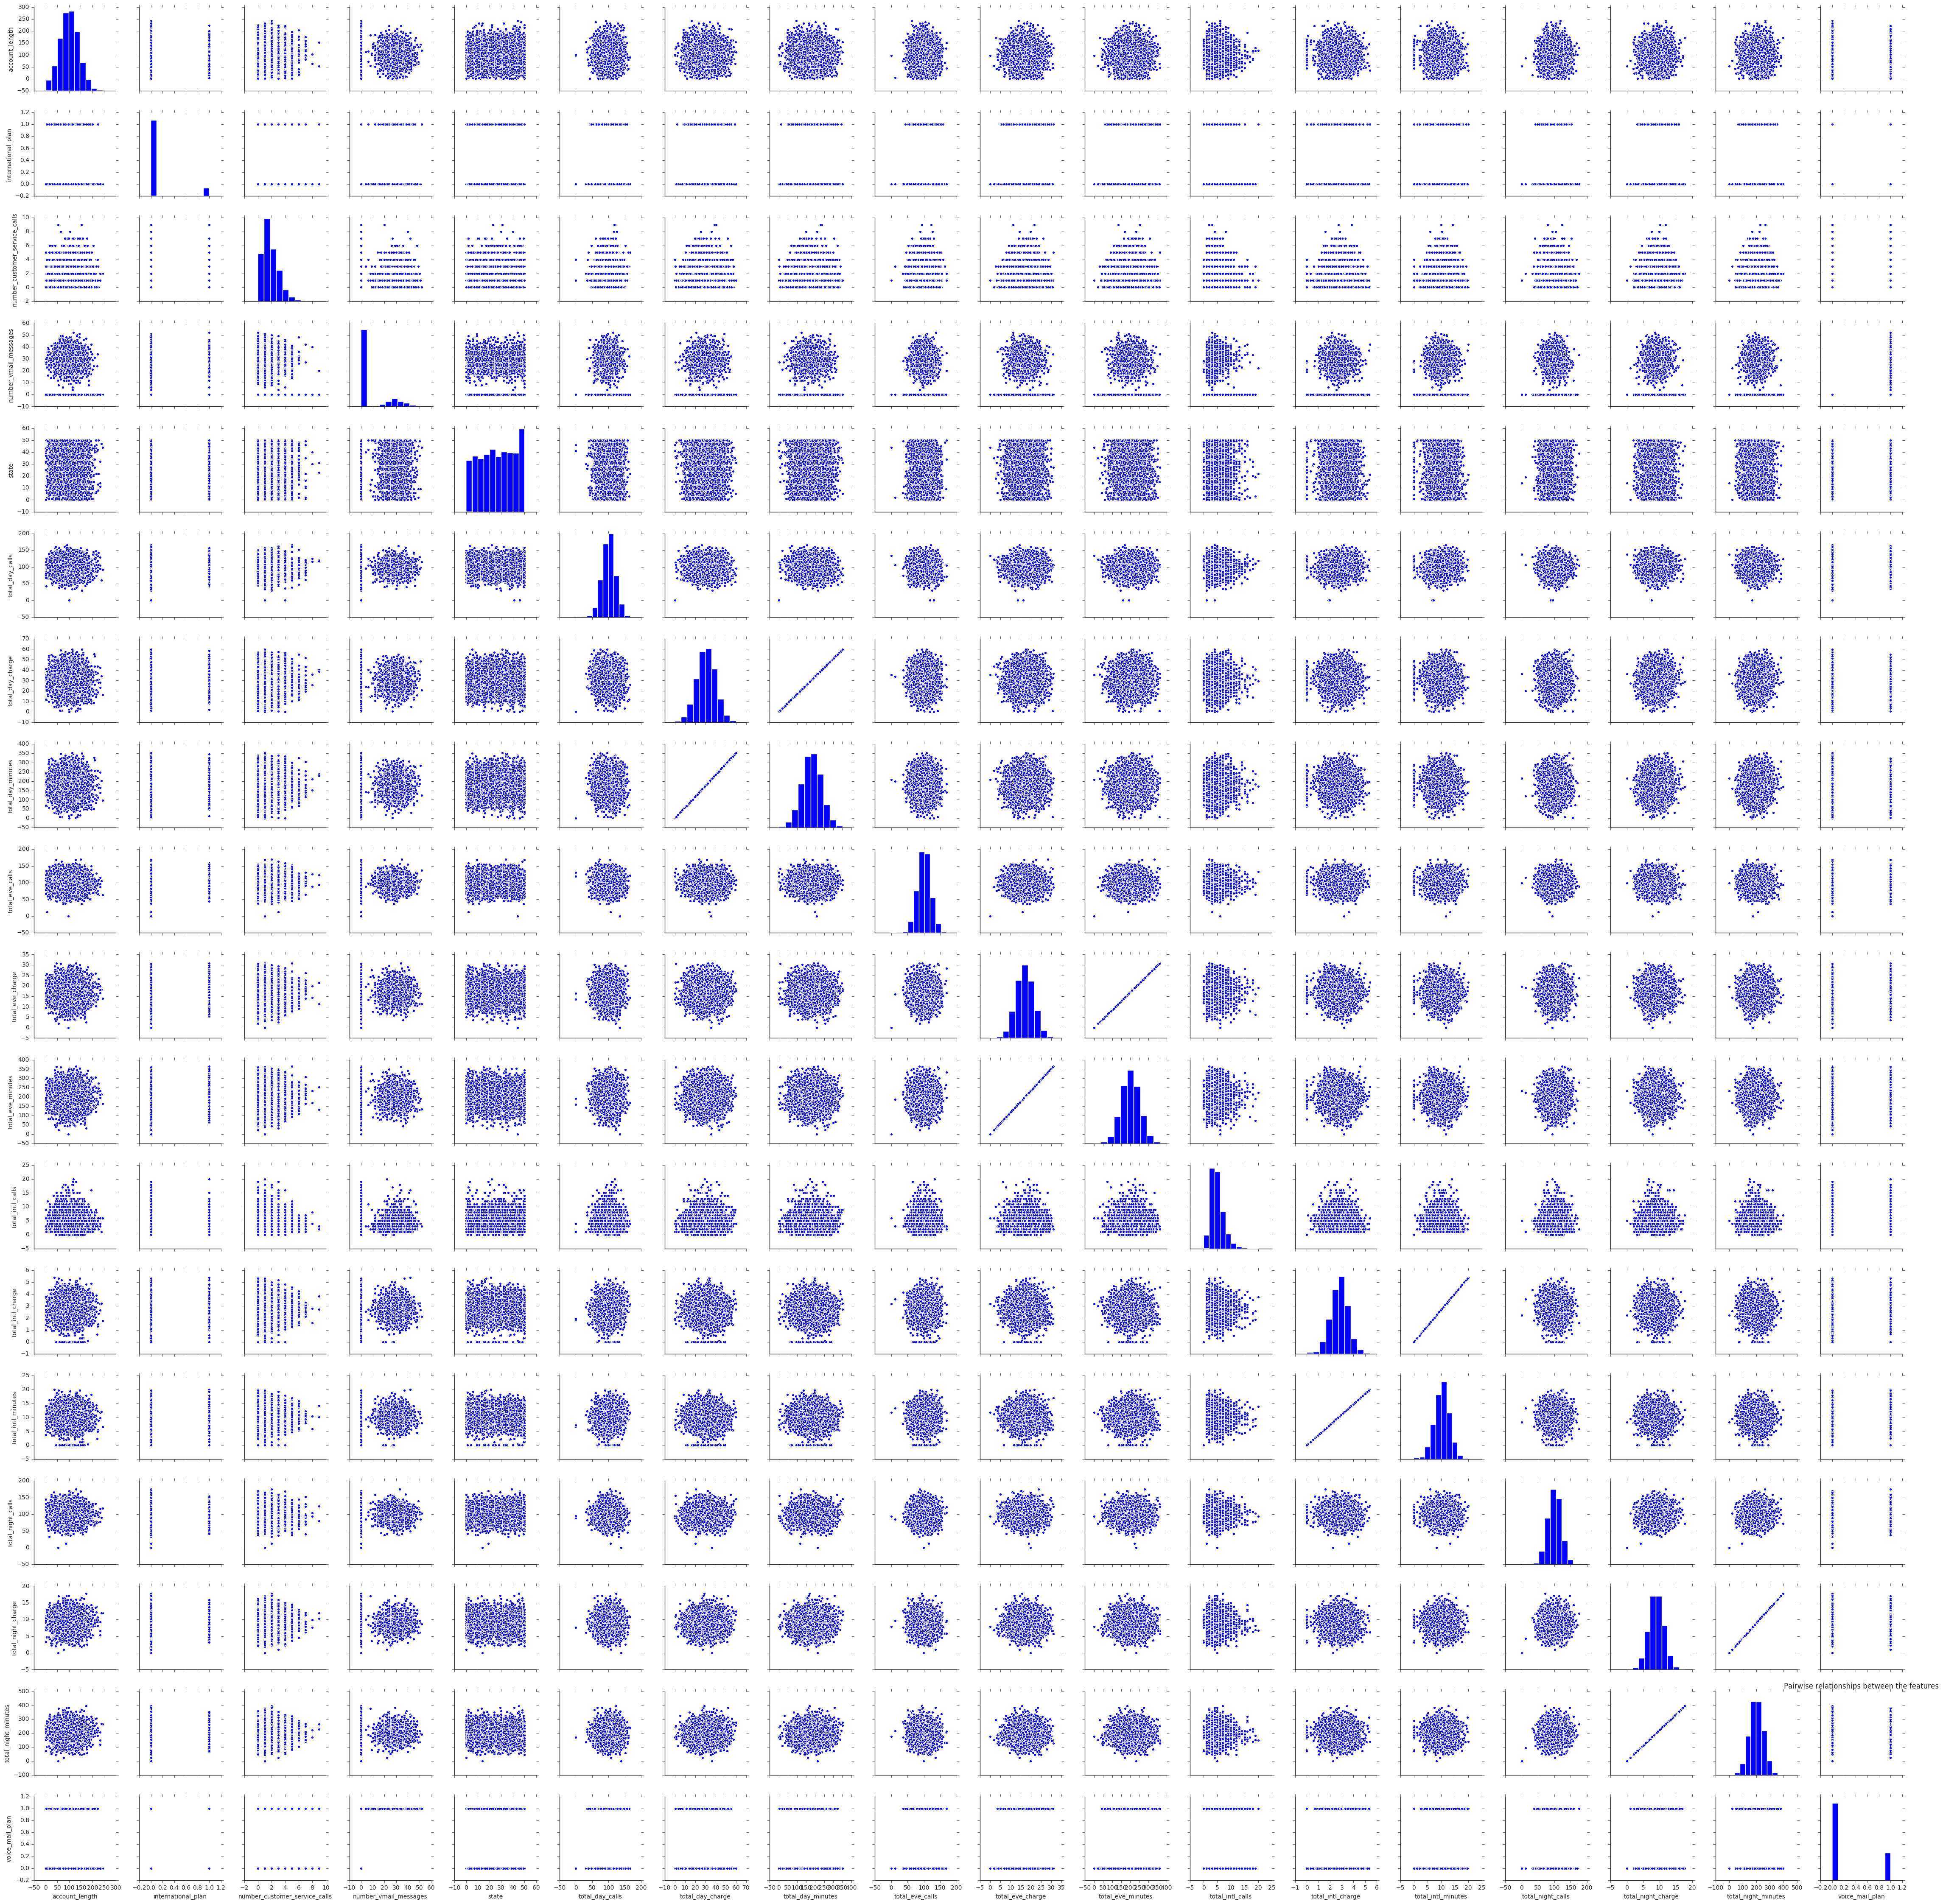

In [7]:
ax = sns.pairplot(features)
plt.title('Pairwise relationships between the features')
plt.show()

This visualization helps us to observe the distribution of data from one feature to the other.

### 1.5 Features Importance

Feature selection process of finding and selecting the most useful features in a dataset. Unnecessary features decrease training speed, the model interpretability and the generalization performance on the test set. Estimating the influence of a given feature to a model prediction is importante mainly in large datasets for performance gain by selecting only the most relevant ones.

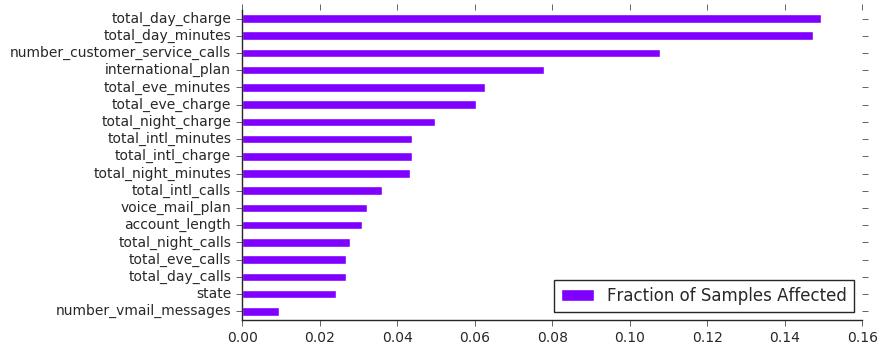

In [8]:
# split dataset into random train and test subsets - random_state is the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.3, random_state=150)

# Random Forest Model
rf = RandomForestClassifier()

# fit the model on your training data
rf.fit(X_train, y_train.values.ravel())

# plot the feature importance
feat_scores = pd.DataFrame(
    {
        'Fraction of Samples Affected': rf.feature_importances_
    },
    index=features.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh', figsize=(8, 4), colormap='rainbow')
sns.despine()

According to the feature importance analysis produced by the Random Forest algorithm, the following features had the highest predictive power:

1. total_day_minutes
2. total_day_charge
3. number_customer_service_calls
4. total_eve_minutes
5. international_plan     


# 2. Models Analysis

Four models have been constructed for application in the problem of this project, namely:

   * **Gradient Boosted**
         
         Produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.
         
   * **Random Forest**
         
         Creates the forest with some number of trees.
         
   * **AdaBoost**
    
         It fits a sequence of weak learners on different weighted training data.
         
         
   * **Logistic Regression**
    
         Models the probability of the default class. The coefficients (Beta values b) of the logistic regression algorithm must be estimated from the training data. 
         
    

### 2.1  K-Fold Cross-validation

K-fold cross validation was applied to try to reduce over-fitting. The idea is to estimate the predictive performance of the model for data that is not yet known. Cross-validation is a robust form, repeats the experiment several times, using several different parts of the training set as validation sets. This provides a more accurate analysis of how the model generalizes to previously unknown data.

In order to run the K-Fold, the dataset will be splitted into a number of folds, in this case 5. So then, each fold will be divided into a train and test subset each with its own features and targets. Each classifier will be trained using the training features and targets, then they will predict the result using the fold test features. Finally the performance of the classifier will be measured using the following metrics below.

    acc: accuracy
    prec: precision referred to as positive predictive value
    rec: recall referred to as the true positive rate or sensitivity
    tpr: true positive rates of predictions
    auc: area under the ROC curve
    fpr: false positive rates of predictions


In K-fold cross validation we repeat the model evaluation process multiple times (instead of one time) and calculate the mean skill. The mean estimate of any parameter is less biased than a one-shot estimate. There is still some bias though. This is implemented in the run_k_fold_classifier below. 

In [24]:
def one_fold_classifier(train_features, train_targets, test_features,
                        test_targets, classifier):

    kfold_result = pd.Series(
        index=['tpr', 'auc', 'acc', 'prec', 'rec'], dtype=object)

    prediction = classifier.fit(train_features, train_targets.values.ravel())
    prediction_prob = prediction.predict_proba(test_features)

    fpr, tpr, t = roc_curve(test_targets, prediction_prob[:, 1])
    y_pred = classifier.predict(test_features)
    mean_fpr = np.linspace(0, 1, 100)

    kfold_result['acc'] = classifier.score(test_features, test_targets)
    kfold_result['prec'] = precision_score(test_targets, y_pred)
    kfold_result['rec'] = recall_score(test_targets, y_pred)
    kfold_result['auc'] = auc(fpr, tpr)
    kfold_result['tpr'] = interp(mean_fpr, fpr, tpr)

    return kfold_result

In [25]:
def run_k_fold_classifier(features, target, classifierName, classifier):

    # computes the result obtained for the k folds individualy
    kfold_results = pd.DataFrame()

    # test training and analysis of results for each fold
    for train_index, test_index in cv.split(features, targets.values.ravel()):
        train_features = features.iloc[train_index]
        train_targets = targets.iloc[train_index]
        test_features = features.iloc[test_index]
        test_targets = targets.iloc[test_index]

        currentFold_result = one_fold_classifier(train_features, train_targets,
                                                 test_features, test_targets,
                                                 classifier)
        kfold_results = kfold_results.append(
            currentFold_result, ignore_index=True)

    # computes the mean of the results obtained for the individual folds
    kfold_mean_aux = kfold_results[['acc', 'prec', 'rec',
                                    'tpr']].apply(np.mean)
    kfold_mean_aux['auc'] = auc(mean_fpr, kfold_mean_aux['tpr'])
    kfold_mean_aux['fpr'] = mean_fpr
    kfold_mean[classifierName] = kfold_mean_aux

In [28]:
# number of folds in the k-fold cross validation
folds = 5

# provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds
cv = StratifiedKFold(n_splits=folds, shuffle=False)

# classifiers to be built
classifiersNames = [
    'LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier',
    'GradientBoostingClassifier'
]
classifiers = [
    LogisticRegression(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# mean value of all folds
kfold_mean = pd.DataFrame(
    index=['fpr', 'tpr', 'auc', 'acc', 'prec', 'rec'],
    columns=[classifiersNames])

# auc parameter
mean_fpr = np.linspace(0, 1, 100)

# training and test for each of the chosen classifiers
for classifiersName, classifier in zip(classifiersNames, classifiers):
    run_k_fold_classifier(features, targets, classifiersName, classifier)

Model 
 LogisticRegression
Scores 
        Mean Accuracy: 0.86 
        Mean Precision: 0.58 
        Mean Recall: 0.17 
        AUC: 0.82
*******

Model 
 RandomForestClassifier
Scores 
        Mean Accuracy: 0.95 
        Mean Precision: 0.93 
        Mean Recall: 0.69 
        AUC: 0.91
*******

Model 
 AdaBoostClassifier
Scores 
        Mean Accuracy: 0.88 
        Mean Precision: 0.66 
        Mean Recall: 0.37 
        AUC: 0.87
*******

Model 
 GradientBoostingClassifier
Scores 
        Mean Accuracy: 0.95 
        Mean Precision: 0.93 
        Mean Recall: 0.73 
        AUC: 0.92
*******



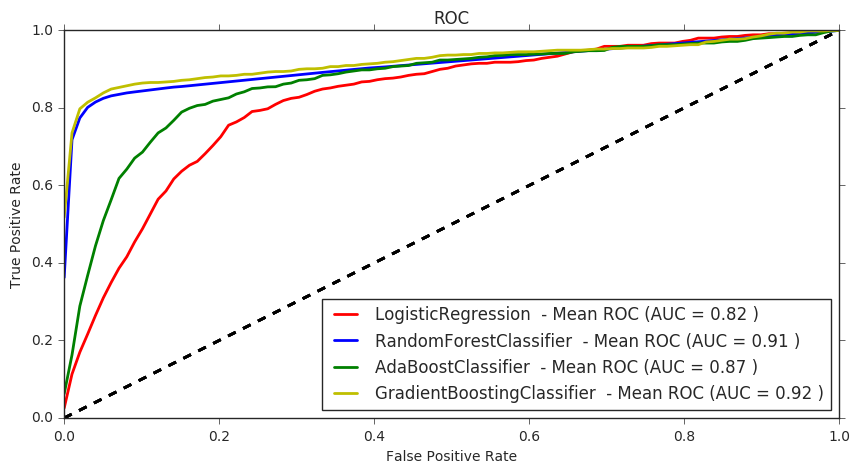

In [27]:
# plot functions

fig1 = plt.figure(figsize=[10, 5])
for index, classifier in enumerate(classifiersNames):
    print("Model \n", str(classifiersNames[index]))

    print_out_scores = "Scores \n\
        Mean Accuracy: {:0.2f} \n\
        Mean Precision: {:0.2f} \n\
        Mean Recall: {:0.2f} \n\
        AUC: {:0.2f}".format(
        kfold_mean[str(classifiersNames[index])]['acc'],
        kfold_mean[str(classifiersNames[index])]['prec'], kfold_mean[str(
            classifiersNames[index])]['rec'], kfold_mean[str(
                classifiersNames[index])]['auc'])
    print(print_out_scores)
    print("*******\n")

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black')
    color = ['r', 'b', 'g', 'y']
    plt.plot(
        kfold_mean[str(classifiersNames[index])]['fpr'],
        kfold_mean[str(classifiersNames[index])]['tpr'],
        color=color[index],
        label=r'%s  - Mean ROC (AUC = %0.2f )' % (str(
            classifiersNames[index]), kfold_mean[str(
                classifiersNames[index])]['auc']),
        lw=2,
        alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

So, to evaluate if the model works, that is, if it was possible to determine which ones present the highest probability of Churn, I used AUC. This is one of the most popular metrics for evaluating machine learning models, especially when there are disproportionate classes.

Their respective mean AUC (Area Under the Curve) for k-fold analysis are listed below:

* Gradient Boosted: 0.92
* Random Forest:    0.92
* AdaBoost:         0.87
* Logistic Regression: 0.82

Gradient Boosted Classifier produced the best AUC.

# 3. Model Tuning


Since the Gradient Boosted Classifier produced the best AUC and the highest Accuracy rates, we will continue with its study. Let's see the errors produced by the model.

###  3.1 Error Analysis

In [17]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, shuffle=True, test_size=0.2, random_state=15)

# fit Model

model = GradientBoostingClassifier().fit(X_train, y_train.values.ravel())

# R^2 - the best R² possible score is 1.0
print("R²: ", model.score(X_test, y_test))
predictions = model.predict(X_test)
mse = mean_squared_error(y_test.values.ravel(), predictions)
rmse = np.sqrt(mse)
print("rmse: ", rmse)

R²:  0.962
rmse:  0.194935886896


### 3.2 Grid Search

Is It Possible to Improve More? One option to try to improve performance even more is to use a grid of hyperparameter ranges, and performing K-Fold CV with each combination of values.

In [14]:
model = GradientBoostingClassifier()
gb_grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [4, 5],
    'min_samples_leaf': [5, 7]
}

gs = GridSearchCV(model, gb_grid_params, cv=10, return_train_score=True)

gs.fit(features, targets.values.ravel())
gs.cv_results_

{'mean_fit_time': array([ 0.67295041,  0.63684165,  0.88860533,  0.87530344,  0.67597919,
         0.58809166,  1.02980034,  0.97995241]),
 'mean_score_time': array([ 0.00163062,  0.00158243,  0.00186665,  0.00188797,  0.00175431,
         0.00155563,  0.00230176,  0.00218167]),
 'mean_test_score': array([ 0.9572,  0.9584,  0.96  ,  0.9586,  0.9576,  0.9592,  0.9582,
         0.9576]),
 'mean_train_score': array([ 0.97780001,  0.97726665,  0.98284442,  0.98197784,  0.98615561,
         0.98488906,  0.99620001,  0.99573332]),
 'param_learning_rate': masked_array(data = [0.1 0.1 0.1 0.1 0.2 0.2 0.2 0.2],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_max_depth': masked_array(data = [4 4 5 5 4 4 5 5],
              mask = [False False False False False False False False],
        fill_value = ?),
 'param_min_samples_leaf': masked_array(data = [5 7 5 7 5 7 5 7],
              mask = [False False False False False False False False],

So, the estimator which gave the highest score on the left out data was:

In [15]:
gs.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [16]:
print("Mean cross-validated score of the best_estimator: ", gs.best_score_ )

Mean cross-validated score of the best_estimator:  0.96


# 4. Conclusion

The model did a good job of predicting churn. Among all the models built, Gradient Boosted Classifier produced the highest AUC and the following scores:

    Accuracy: 96% labeled correctly
    Precision: 93% labeled as churn actually churned (5% were wrongly labeled as churn)
    Recall: 74% that actually churned were labeled as churn (2% of churn users were labeled as non-churn)
    
    
The best results achieved by the [OpenML](https://www.openml.org/t/167141) users for this set of dots have had results similar to this one, 95% accuracy using Random Forest. In this project, we were able to optimize this result using Gradient Boosted Classifier, with 96% accuracy.

